In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [7]:
engine.execute('SELECT * FROM station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [8]:
# reflect an existing database into a new model
data = automap_base()
# reflect the tables
data.prepare(engine, reflect=True)

In [9]:
# We can view all of the classes that automap found
data.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
measurement = data.classes.measurement
station = data.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
all_days = session.query(func.count(measurement.date)).all()
first_day = session.query(measurement.date).order_by(measurement.date).first()
last_day = session.query(measurement.date).order_by(measurement.date.desc()).first()

print(last_day)



('2017-08-23',)


In [14]:
# Perform a query to retrieve the data and precipitation scores
year_ago_df = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date > ('2016-08-23')).all()
print(year_ago_df)


[('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 0.0), ('2016-10-09', 

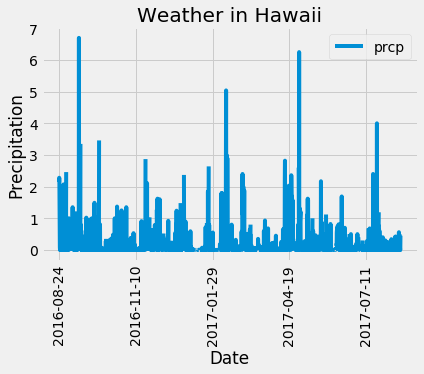

In [15]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(year_ago_df, columns=['date', 'prcp'])
df.set_index('date', inplace=True)
# Sort the dataframe by date
df = df.sort_values(by='date')

# Use Pandas Plotting with Matplotlib to plot the data
bar_chart = df.plot(rot=90)
bar_chart.set_title('Weather in Hawaii')
bar_chart.set_ylabel('Precipitation')
bar_chart.set_xlabel('Date')

plt.savefig('weather_hawaii.png')

In [16]:
# Design a query to show how many stations are available in this dataset?
all_stations = session.query(func.distinct(station.name)).all()
station_count = session.query(func.distinct(station.name)).count()
station_count

9

In [17]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

station_numbers = session.query(measurement.station, func.count(measurement.station))
station_numbers

active_station_count = station_numbers.group_by(measurement.station).all()
active_station_count



[('USC00511918', 1979),
 ('USC00513117', 2709),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00517948', 1372),
 ('USC00518838', 511),
 ('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00519523', 2669)]

In [18]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
lowest_temp = session.query(measurement.station, func.min(measurement.tobs))
lowest_temp

lowest_temp_station = lowest_temp.group_by(measurement.station).all()
lowest_temp_station

print('The lowest temperature of the most active station "USC00519281" is 54.0 degrees')

The lowest temperature of the most active station "USC00519281" is 54.0 degrees


In [19]:
highest_temp_station = session.query(measurement.station, func.max(measurement.tobs)).group_by(measurement.station).all()
highest_temp_station

print('The highest temperature of the most active station "USC00519281" is 85 degrees')

The highest temperature of the most active station "USC00519281" is 85 degrees


In [20]:
avg_temp_station = session.query(measurement.station, func.avg(measurement.tobs)).group_by(measurement.station).all()
avg_temp_station

print('The average temperature of the most active station "USC00519281" is 71.66 degrees on 2,772 entries.')

The average temperature of the most active station "USC00519281" is 71.66 degrees on 2,772 entries.


In [21]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
date = dt.datetime(2016, 8, 23)

results = session.query(measurement.tobs).\
    filter(measurement.date>date).filter(measurement.station=='USC00519281').all()

histo = list(np.ravel(results))

histo

[77.0,
 80.0,
 80.0,
 75.0,
 73.0,
 78.0,
 77.0,
 78.0,
 80.0,
 80.0,
 78.0,
 78.0,
 78.0,
 73.0,
 74.0,
 80.0,
 79.0,
 77.0,
 80.0,
 76.0,
 79.0,
 75.0,
 79.0,
 78.0,
 79.0,
 78.0,
 78.0,
 76.0,
 74.0,
 77.0,
 78.0,
 79.0,
 79.0,
 77.0,
 80.0,
 78.0,
 78.0,
 78.0,
 77.0,
 79.0,
 79.0,
 79.0,
 79.0,
 75.0,
 76.0,
 73.0,
 72.0,
 71.0,
 77.0,
 79.0,
 78.0,
 79.0,
 77.0,
 79.0,
 77.0,
 78.0,
 78.0,
 78.0,
 78.0,
 77.0,
 74.0,
 75.0,
 76.0,
 73.0,
 76.0,
 74.0,
 77.0,
 76.0,
 76.0,
 74.0,
 75.0,
 75.0,
 75.0,
 75.0,
 71.0,
 63.0,
 70.0,
 68.0,
 67.0,
 77.0,
 74.0,
 77.0,
 76.0,
 76.0,
 75.0,
 76.0,
 75.0,
 73.0,
 75.0,
 73.0,
 75.0,
 74.0,
 75.0,
 74.0,
 75.0,
 73.0,
 75.0,
 73.0,
 73.0,
 74.0,
 70.0,
 72.0,
 70.0,
 67.0,
 67.0,
 69.0,
 70.0,
 68.0,
 69.0,
 69.0,
 66.0,
 65.0,
 68.0,
 62.0,
 75.0,
 70.0,
 69.0,
 76.0,
 76.0,
 74.0,
 73.0,
 71.0,
 74.0,
 74.0,
 72.0,
 71.0,
 72.0,
 74.0,
 69.0,
 67.0,
 72.0,
 70.0,
 64.0,
 63.0,
 63.0,
 62.0,
 70.0,
 70.0,
 62.0,
 62.0,
 63.0,
 65.0,
 69.0,

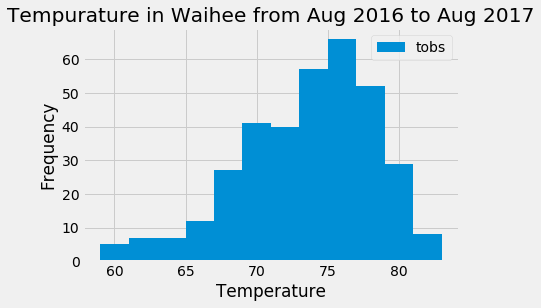

In [22]:
x = histo
plt.hist(x, bins = 12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(['tobs'])
plt.title('Tempurature in Waihee from Aug 2016 to Aug 2017')
plt.show()

In [23]:
from flask import Flask, jsonify

#################################################
# Database Setup
#################################################
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
measurement = data.classes.measurement
station = data.classes.station


app = Flask(__name__)

In [24]:
@app.route("/")
def index():
    return (
        f"<h2>Available Routes:<h2><br/>"
        f"<h3>/api/v1.0/precipitation<h3><br/>"
        f"<h3>/api/v1.0/stations<h3><br/>"
    )


@app.route("/api/v1.0/precipitation")
def precipitation():
    # Create our session (link) from Python to the DB
    session = Session(engine)

    """Return a list of percipitation data"""
    # Query all precipitation data
    result = session.query(measurement.prcp).all()

    session.close()

    # Create a dictionary from the row data and append to a list of all_passengers
    all_percipitation = []
    for station, date, prcp, tobs in result:
        precipitation_dict = {}
        precipitation_dict["station"] = station
        precipitation_dict["date"] = date
        precipitation_dict["prcp"] = prcp
        precipitation_dict["tobs"] = tobs
        all_precipitation.append(precipitation_dict)

    return jsonify(all_percipitation)

@app.route("/api/v1.0/stations")
def stations():
    # Create our session (link) from Python to the DB
    session = Session(engine)

    # Query all stations
    results1 = session.query(station.name).all()

    session.close()

    # Convert list of tuples into normal list
    all_station = list(np.ravel(results1))

    return jsonify(all_station)

@app.route("/api/v1.0/tobs")
def tobs():
    # Create our session (link) from Python to the DB
    session = Session(engine)

    # Query temperature of most popular station for a year ago
    histo = list(np.ravel(results))

    session.close()

    # Convert list of tuples into normal list
    all_temperatures = list(np.ravel(histo))

    return jsonify(all_station)

if __name__ == "__main__"
    app.run(debug=True)

SyntaxError: invalid syntax (<ipython-input-24-bef3ab6f5e56>, line 63)

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
